In [66]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
## Read epitope data
path_to_epitope_file = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/MHCII/epitope_data_MHCII.csv"
# path_to_epitope_file = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/MHCI/epitope_table_export_1640338769.csv"
epitope_raw_df = pd.read_csv(path_to_epitope_file,skiprows=1)
epitope_raw_df = epitope_raw_df[['Epitope ID',"Description","Antigen Name"]]
## Read experiment data
path_to_experiment_file = "/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/MHCII/experiment_data_MHCII.csv"
experiment_raw_df = pd.read_csv(path_to_experiment_file,skiprows=1)
experiment_raw_df = experiment_raw_df[['Epitope ID',"Cell Type","Allele Name","Antigen Description","Qualitative Measure","Assay Group","Number of Subjects Tested","Number of Subjects Responded"]].dropna()
experiment_raw_df = experiment_raw_df[experiment_raw_df["Number of Subjects Tested"] > 0]
experiment_raw_df.sort_values(by='Epitope ID', ascending=True)

/var/folders/px/wpqhk62d559gjgm0ql254vq00000gn/T/ipykernel_5270/1704241563.py:8: DtypeWarning: Columns (14,27,28,45,46,47,48,53,54,61,62,63,73,81,86,88,97,109) have mixed types. Specify dtype option on import or set low_memory=False.
  experiment_raw_df = pd.read_csv(path_to_experiment_file,skiprows=1)


,Epitope ID,Cell Type,Allele Name,Antigen Description,Qualitative Measure,Assay Group,Number of Subjects Tested,Number of Subjects Responded
17661,29,T cell CD4+,HLA class II,AAAEGVGKDNKLSVLLFTTQ,Negative,IFNg release,3.0,0.0
14870,37,T cell CD4+,HLA class II,AAAGNEGTSGSSSTV,Negative,proliferation,113.0,5.0
82963,39,T cell CD4+,HLA-DRB1*04:03,AAAIFMTATPPGTAD,Positive,IFNg release,5.0,1.0
82964,39,T cell CD4+,HLA-DRB1*04:07,AAAIFMTATPPGTAD,Positive,IFNg release,6.0,2.0
14984,48,T cell CD4+,HLA class II,AAALILSKHPNLSAS,Negative,proliferation,92.0,4.0
...,...,...,...,...,...,...,...,...
112878,1667089,T cell CD4+,HLA-DR4,ILLGRMSLFMPEDTG,Positive-High,proliferation,5.0,4.0
112279,1670719,T cell CD4+,HLA-DR4,KKLQCVQLHVISM,Positive-Low,proliferation,6.0,1.0
112879,1681231,T cell CD4+,HLA-DR4,NDLMLLRLSEPAELT,Positive-Low,proliferation,5.0,2.0
112277,1684670,T cell CD4+,HLA-DR4,PALGTTCVASGMGSI,Positive-Low,proliferation,3.0,1.0


In [68]:
experiment_df = experiment_raw_df[(experiment_raw_df["Allele Name"].str.contains('\*')) & (~experiment_raw_df["Allele Name"].isna())]
experiment_df

,Epitope ID,Cell Type,Allele Name,Antigen Description,Qualitative Measure,Assay Group,Number of Subjects Tested,Number of Subjects Responded
64,72656,T cell,HLA-DPB1*04:01,WITQCFLPVFLAQPPSGQRR,Positive,IFNg release,18.0,3.0
110,64950,PBMC,HLA-DPB1*04:01,TLLYVLFEV,Positive,IFNg release,2.0,2.0
118,69572,PBMC,HLA-DRB1*04:01,VLKSYVLEGTLTAEK,Positive,proliferation,2.0,2.0
119,69572,Other,HLA-DRB1*04:01,VLKSYVLEGTLTAEK,Positive,proliferation,2.0,2.0
120,69572,Other,HLA-DRB1*01:01,VLKSYVLEGTLTAEK,Negative,proliferation,3.0,3.0
...,...,...,...,...,...,...,...,...
111731,1628590,T cell CD4+,HLA-DPB1*04:01,DRETNKSRGFAFVIFESPADAKDAA,Positive,IFNg release,1.0,1.0
111732,1628590,T cell CD4+,HLA-DPB1*02:01,DRETNKSRGFAFVIFESPADAKDAA,Positive,IFNg release,1.0,1.0
111733,1631454,T cell CD4+,HLA-DQB1*02:02,LPPTVYLRVTENIPHIISFIEGIIAR,Positive,IFNg release,1.0,1.0
112243,1597839,T cell CD4+,HLA-DQA1*01:02/DQB1*06:02,VKDVLEKGIPTLQSPTVE,Positive,IFNg release,3.0,3.0


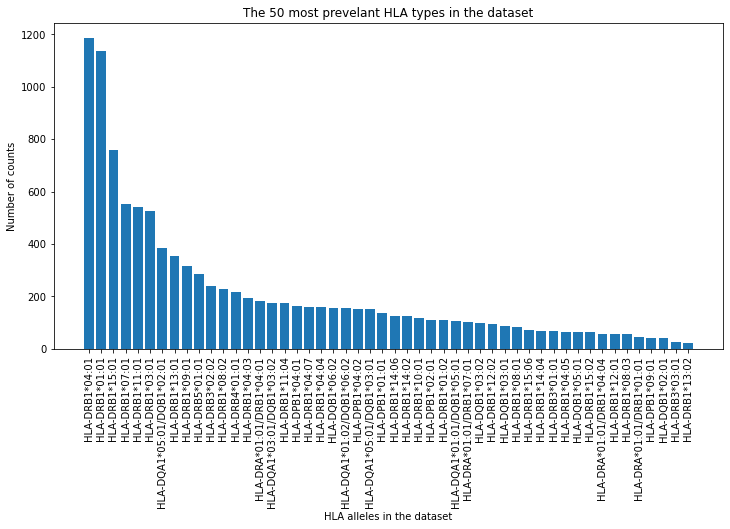

In [69]:
def show_HLA_dist(experiment_data):
    unique, counts = np.unique(experiment_data["Allele Name"],return_counts=True)
    count_dict = {allele:count for (allele,count) in zip(unique, counts)}
    unique = sorted(unique,key=lambda x: count_dict[x],reverse=True)
    counts = [count_dict[x] for x in unique]

    N = 50
    fig = plt.figure(figsize=(12,6))
    plt.bar(np.arange(N),counts[:N])
    plt.xticks(np.arange(N),unique[:N],rotation=90)
    plt.title("The 50 most prevelant HLA types in the dataset")
    plt.xlabel("HLA alleles in the dataset")
    plt.ylabel("Number of counts")
    plt.show()
show_HLA_dist(experiment_df)


/var/folders/px/wpqhk62d559gjgm0ql254vq00000gn/T/ipykernel_5270/3522165101.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df["epitope_length"] = experiment_df["Antigen Description"].apply(lambda x: len(x.strip()))


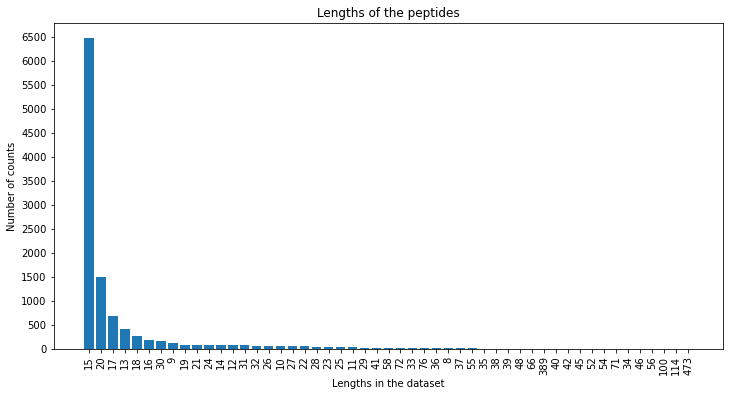

In [70]:
def show_peptide_lengths(experiment_data):
    ## Filter based on epitope length
    unique, counts = np.unique(experiment_data["epitope_length"],return_counts=True)
    count_dict = {allele:count for (allele,count) in zip(unique, counts)}
    unique = sorted(unique,key=lambda x: count_dict[x],reverse=True)
    counts = [count_dict[x] for x in unique]

    fig = plt.figure(figsize=(12,6))
    plt.bar(np.arange(len(counts)),counts)
    plt.xticks(np.arange(len(unique)),unique,rotation=90)
    plt.title("Lengths of the peptides")
    plt.xlabel("Lengths in the dataset")
    plt.ylabel("Number of counts")
    plt.yticks(np.arange(0,7000,500),np.arange(0,7000,500))
    plt.show()



epitope_ids,counts = np.unique(experiment_df["Epitope ID"],return_counts=True)
experiment_df["epitope_length"] = experiment_df["Antigen Description"].apply(lambda x: len(x.strip()))
show_peptide_lengths(experiment_df)
filter_lengths = [15] # ,20,17
experiment_df = experiment_df[experiment_df.epitope_length.isin(filter_lengths)]



In [71]:
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)
filterchars = list("x123456789 \t!?")
non_filtered = [len(Intersection(filterchars, list(x.lower()))) == 0  for x in experiment_df["Antigen Description"]]
non_filtered
experiment_df = experiment_df[non_filtered]
experiment_df

,Epitope ID,Cell Type,Allele Name,Antigen Description,Qualitative Measure,Assay Group,Number of Subjects Tested,Number of Subjects Responded,epitope_length
118,69572,PBMC,HLA-DRB1*04:01,VLKSYVLEGTLTAEK,Positive,proliferation,2.0,2.0,15
119,69572,Other,HLA-DRB1*04:01,VLKSYVLEGTLTAEK,Positive,proliferation,2.0,2.0,15
120,69572,Other,HLA-DRB1*01:01,VLKSYVLEGTLTAEK,Negative,proliferation,3.0,3.0,15
121,69572,PBMC,HLA-DRB1*04:01,VLKSYVLEGTLTAEK,Positive,proliferation,1.0,1.0,15
135,8127,PBMC,HLA-DPB1*04:01,DEPTLLYVLFEVFDV,Positive,IFNg release,5.0,5.0,15
...,...,...,...,...,...,...,...,...,...
110280,1393703,PBMC,HLA-DQB1*06:02,ESVAWSASACHDGIN,Positive-Intermediate,IFNg release,28.0,11.0,15
110281,1393830,PBMC,HLA-DQB1*06:02,KTRIAYERMCNILKG,Positive-High,IFNg release,52.0,29.0,15
110586,1310865,T cell CD4+,HLA-DRB1*15:02,TRFQTLLALHRSYLT,Positive,qualitative binding,3.0,3.0,15
110587,1310865,T cell CD4+,HLA-DRB1*15:02,TRFQTLLALHRSYLT,Positive,activation,3.0,3.0,15


## PCA analysis for outlier detection

In [72]:
def onehot_encode_peptide(peptide):
    aminoacids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
    encoded_peptide = pd.Series(list(peptide))
    encoded_peptide = encoded_peptide.astype(pd.CategoricalDtype(categories=aminoacids))
    encoded_peptide = pd.get_dummies(encoded_peptide)
    return encoded_peptide.to_numpy()

def categorical_encode_peptide(peptide):
    aminoacids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
    encoded_peptide = np.array([aminoacids.index(x)+1 for x in list(peptide)])
    return encoded_peptide



N,M = experiment_df.shape
X = []
onehot = []
categorical = []
aims_features = []
for i in range(N):
    peptide = experiment_df.iloc[i]["Antigen Description"]
    # One-hot encoding
    one_hot_encoded_peptide = onehot_encode_peptide(peptide)
    onehot.append(one_hot_encoded_peptide.reshape(-1,))
    # Categorical encoding
    categorical_encoded_peptide = categorical_encode_peptide(peptide)
    categorical.append(categorical_encoded_peptide.reshape(-1,))

experiment_df["categorical"] = categorical
experiment_df["onehot"] = onehot

In [73]:
X_onehot = experiment_df["onehot"].to_numpy()
longest = 20*20

for i,row in enumerate(X_onehot):
    if len(row) != longest:
        padding_len = longest - len(row)
        padding = np.zeros(padding_len)
        padded_row = np.concatenate((padding,row))
        X_onehot[i] = padded_row

X_onehot = np.vstack(X_onehot).astype(float)
X_onehot.shape

(6474, 400)

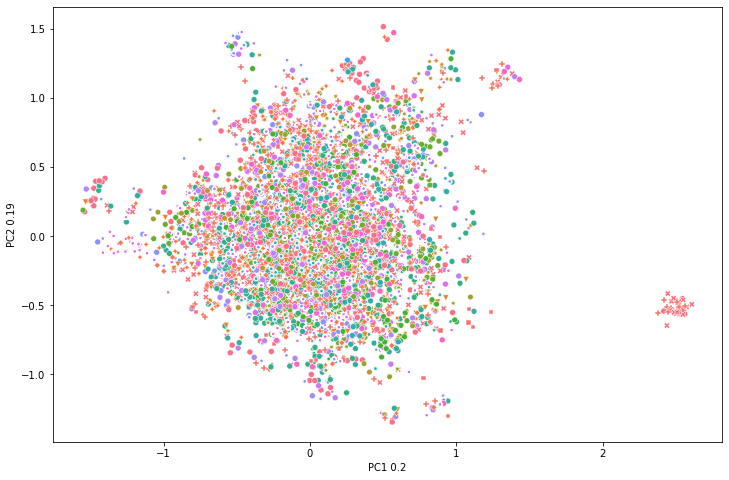

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_onehot)
principalComponents = principalComponents + np.random.normal(0,0.05,principalComponents.shape)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

principalDf.loc[:,"MHC"] = [x for x in experiment_df["Allele Name"]]
# principalDf.loc[principalDf['immunogenecity'] <= 0.1, 'immunogenecity'] = 0
# principalDf.loc[principalDf['immunogenecity'] > 0.1, 'immunogenecity'] = 1
pc1_var, pc2_var = pca.explained_variance_
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data=principalDf, x="PC1", y="PC2",hue="MHC",style="MHC")
plt.xlabel(f"PC1 {round(pc1_var,2)}")
plt.ylabel(f"PC2 {round(pc2_var,2)}")
plt.legend('',frameon=False)
plt.show()

In [77]:
principalDf[principalDf.PC1 > 2]

,PC1,PC2,MHC
84,2.495028,0.316888,HLA-DRB1*15:01
85,2.495028,0.316888,HLA-DRB1*04:01
86,2.495028,0.316888,HLA-DRB1*01:01
87,2.495028,0.316888,HLA-DRB1*15:01
88,2.495028,0.316888,HLA-DRB1*04:01
89,2.495028,0.316888,HLA-DRB1*01:01
90,2.495028,0.316888,HLA-DRB1*15:01
91,2.495028,0.316888,HLA-DRB1*04:01
92,2.495028,0.316888,HLA-DRB1*01:01
93,2.495028,0.316888,HLA-DRB1*15:01


In [80]:
epitope_raw_df["epitope_length"] = epitope_raw_df["Description"].apply(lambda x: len(x.strip()))
epitope_df = epitope_raw_df[epitope_raw_df.epitope_length.isin(filter_lengths)]

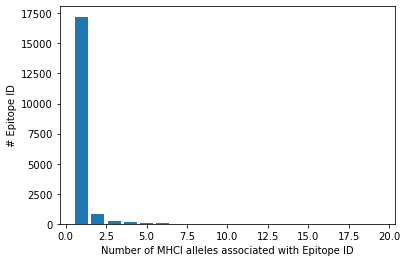

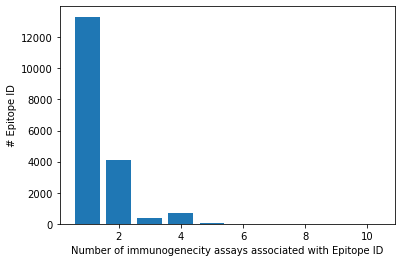

In [81]:
from scipy.stats import betabinom

epitope_IDS = epitope_df["Epitope ID"]
unique_alleles = []
unique_assays = []
experiment_scores = dict()

for ID in epitope_IDS:
    if len(experiment_raw_df[experiment_raw_df["Epitope ID"] == ID]) == 0:
        continue

    number_of_assay_groups_for_id = len(set(experiment_raw_df[experiment_raw_df["Epitope ID"] == ID]["Assay Group"]))
    number_of_HLA_alleles = len(set(experiment_raw_df[experiment_raw_df["Epitope ID"] == ID]["Allele Name"]))
    unique_alleles.append(number_of_HLA_alleles)
    unique_assays.append(number_of_assay_groups_for_id)

    if number_of_assay_groups_for_id  == 0 :
        print(experiment_raw_df[experiment_raw_df["Epitope ID"] == ID])



    peptide = list(epitope_df[epitope_df["Epitope ID"] == ID]["Description"])[0]
    experiments_with_peptide = experiment_raw_df[experiment_raw_df["Epitope ID"] == ID]
    
    
    for i,experiment in experiments_with_peptide.iterrows():
        if experiment["Antigen Description"] == peptide:
            unique_identifier = peptide + "_" + experiment["Allele Name"]
            
            if unique_identifier not in experiment_scores.keys():
                experiment_scores[unique_identifier] = dict()
            
            assay = experiment["Assay Group"]
            tested_subjects = experiment["Number of Subjects Tested"]
            positive_subjects = experiment["Number of Subjects Responded"]
            N = tested_subjects
            m = positive_subjects
            a = 1 + m
            b = 1 + N - m
            score = betabinom.mean(1,a, b)
            
            if assay not in experiment_scores[unique_identifier].keys():
                experiment_scores[unique_identifier][assay] = [score]
            else:
                experiment_scores[unique_identifier][assay].append(score)


unique_alleles, counts= np.unique(unique_alleles,return_counts=True)
plt.bar(unique_alleles,counts)
plt.xlabel("Number of MHCI alleles associated with Epitope ID")
plt.ylabel("# Epitope ID")
plt.show()

unique_assays, counts= np.unique(unique_assays,return_counts=True)
plt.bar(unique_assays,counts)
plt.xlabel("Number of immunogenecity assays associated with Epitope ID")
plt.ylabel("# Epitope ID")
plt.show()

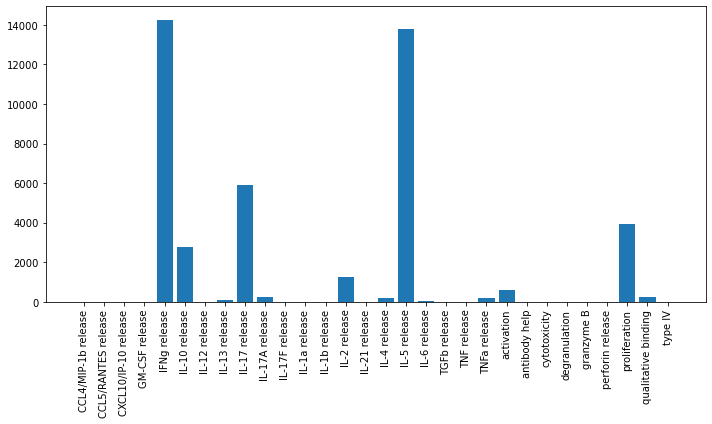

In [82]:
epitope_IDS = epitope_df["Epitope ID"]
experiments = experiment_raw_df[experiment_raw_df["Epitope ID"].isin(epitope_IDS)]["Assay Group"].to_numpy()
unique_experiments,counts = np.unique(experiments,return_counts=True)

experiment_counter = {x:y for x,y in zip(unique_experiments,counts)}

most_common_experiments = sorted(experiment_counter.keys(),key=lambda x: experiment_counter[x],reverse=True)
fig = plt.figure(figsize=(10,6))
plt.bar(np.arange(len(unique_experiments)),counts)
unique_experiments = [" ".join(x.split()[:2]) for x in unique_experiments]
plt.xticks(np.arange(len(unique_experiments)),unique_experiments,rotation=90)

plt.tight_layout()
plt.show()

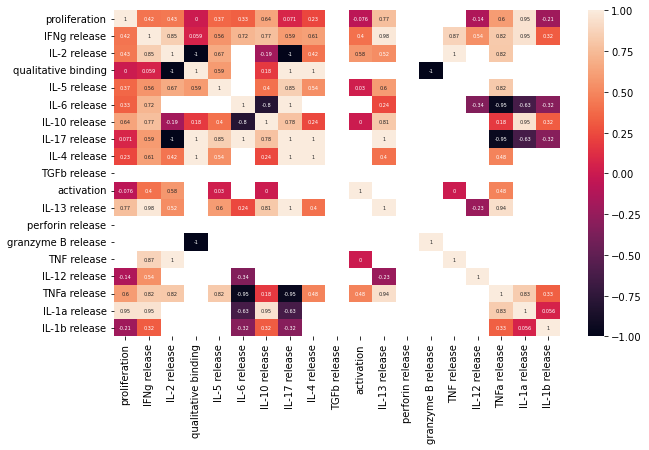

In [84]:
import copy
assay_correlation_dict = copy.deepcopy(experiment_scores)
for peptide_HLA in assay_correlation_dict.keys():
    for assay in assay_correlation_dict[peptide_HLA].keys():
        assay_correlation_dict[peptide_HLA][assay] = np.mean(assay_correlation_dict[peptide_HLA][assay])

assay_correlation_df = pd.DataFrame.from_dict(assay_correlation_dict).T
assay_correlation_df = assay_correlation_df.iloc[:-10,:-10]
fig = plt.figure(figsize=(10,6))
corr = assay_correlation_df.corr(method="spearman")
sns.heatmap(corr,annot=True,annot_kws={"fontsize":5})
plt.show()
